In [44]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [35]:
# Let's load the data
df = pd.read_csv('data/USvideos.csv')
# df = df[['video_id','category_id','publish_time','views', 'likes', 'dislikes', 'comment_count']]

# drop the 'video_id' since unique
df.drop(columns=['video_id'],inplace=True)
print("Data Frame shape: ", df.shape)
print(df.nunique())
print(df.columns)

Data Frame shape:  (40949, 15)
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64
Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [50]:
df.isnull().sum()

trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_name              57
dtype: int64

In [37]:
# change catagory_id to catagory name
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

df.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [38]:
# collect the various features
# ['trending_date', 'title', 'channel_title', 'category_id',
#        'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
#        'thumbnail_link', 'comments_disabled', 'ratings_disabled',
#        'video_error_or_removed', 'description', 'category_name']
num_ftr = ['likes', 'dislikes', 'comment_count']
cat_ftr = ['category_name']
lb_ftr = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
y = df['views']

In [46]:
scaler = MinMaxScaler()
le = LabelEncoder()
mms = scaler.fit_transform(df[['likes', 'dislikes', 'comment_count']])
df_mms = pd.DataFrame(mms, columns = ['likes', 'dislikes', 'comment_count'])
df_other = df[['category_id','publish_time', 'views']]
df_new = pd.concat([df_other, df_mms], axis = 1)

df_new.head()

,category_id,publish_time,views,likes,dislikes,comment_count
0,22,2017-11-13T17:13:01.000Z,748374,0.010247,0.001771,0.011717
1,24,2017-11-13T07:30:00.000Z,2418783,0.017312,0.003671,0.009330
2,23,2017-11-12T19:05:24.000Z,3191434,0.026013,0.003189,0.006008
3,24,2017-11-13T11:00:04.000Z,343168,0.001812,0.000398,0.001576
4,24,2017-11-12T18:01:41.000Z,2095731,0.023555,0.001188,0.012866


Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


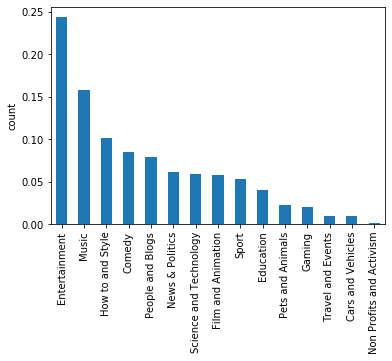

In [43]:
# what is the ranking of catagories...?

print(df['category_name'].value_counts())
# pd.value_counts(df['category_name'],normalize=False).plot.bar()
pd.value_counts(df['category_name'],normalize=True).plot.bar()
plt.ylabel('count')
plt.show()